# Ejemplo tensorflow

Es un modelo muy popular de regresión utilizado cuando la variable a predecir (dependiente) es cualitativa (es decir númerica discreta, o nóminal); basada en la probabilidad de que un evento ocurra a partir de las variables independientes las cuales pueden ser categoricas o númericas (la importancia) de las variables independientes.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de Naive Bayes; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">aquí</a>

In [1]:
!pip install tensorflow

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora vamos a agregar la librería que contiene el modelo de Naive Bayes y la librería datetime, puesto que vamos a crear una función **gaussian_naive_bayes_algorithm** que recibe como parametro las variables **iterations, train_data, x_variables, y_variable** que hacen referencia la cantidad máxima de iteraciones para la convergencia del modelo, el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [74]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import datetime

print(tf.__version__)

def build_simple_tensorflow_model(train):
    start_time = datetime.datetime.now()
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    elapsed_time = datetime.datetime.now() - start_time
    train_elapsed_time = elapsed_time.total_seconds() * 1000
    return model, train_elapsed_time

2.5.0-rc0


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
target_column_name = 'type'

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del modelo de regresión logística con el siguiente fragmento de código:

In [5]:
dataset.pop('animal_name')

# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)
# Ahora vamos a extraer la variable que representa la decision de ambos conjuntos de datos (entrenamiento, y validacion) respectivamente

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
hair,61.0,0.409836,0.495885,0.0,0.0,0.0,1.0,1.0
feathers,61.0,0.213115,0.412907,0.0,0.0,0.0,0.0,1.0
eggs,61.0,0.622951,0.488669,0.0,0.0,1.0,1.0,1.0
milk,61.0,0.377049,0.488669,0.0,0.0,0.0,1.0,1.0
airbone,61.0,0.245902,0.434194,0.0,0.0,0.0,0.0,1.0
aquatic,61.0,0.409836,0.495885,0.0,0.0,0.0,1.0,1.0
predator,61.0,0.573770,0.498632,0.0,0.0,1.0,1.0,1.0
toother,61.0,0.606557,0.492568,0.0,0.0,1.0,1.0,1.0
backbone,61.0,0.852459,0.357588,0.0,1.0,1.0,1.0,1.0
breathes,61.0,0.770492,0.424006,0.0,1.0,1.0,1.0,1.0


In [7]:
train_data.corr(method='pearson')

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.433680,-0.796027,0.864805,-0.243644,-0.491111,-0.090609,0.398219,0.064715,0.454814,-0.086095,-0.328540,0.463489,-0.065987,0.311248,0.408144,-0.513591
feathers,-0.433680,1.000000,0.404877,-0.404877,0.632457,-0.026688,-0.118107,-0.646169,0.216506,0.284031,-0.137862,-0.257539,-0.215019,0.297179,-0.103627,-0.094616,-0.212644
eggs,-0.796027,0.404877,1.000000,-0.930206,0.444262,0.373208,-0.054944,-0.626581,-0.323662,-0.344169,0.069445,0.214821,-0.203184,-0.130059,-0.343989,-0.478572,0.686741
milk,0.864805,-0.404877,-0.930206,1.000000,-0.444262,-0.373208,0.054944,0.557339,0.323662,0.424607,-0.206094,-0.214821,0.268761,0.130059,0.343989,0.546305,-0.721870
airbone,-0.243644,0.632457,0.444262,-0.444262,1.000000,-0.166236,-0.277637,-0.709026,-0.299159,0.311661,0.002521,-0.282592,0.133092,-0.115942,-0.130222,-0.314921,0.162034
aquatic,-0.491111,-0.026688,0.373208,-0.373208,-0.166236,1.000000,0.313817,0.125282,0.158706,-0.575665,0.183227,0.593846,-0.441241,0.088828,-0.252697,-0.125835,0.282617
predator,-0.090609,-0.118107,-0.054944,0.054944,-0.277637,0.313817,1.000000,0.188001,0.108796,-0.233908,0.094402,0.176352,-0.222302,0.046694,-0.295742,0.090320,-0.009312
toother,0.398219,-0.646169,-0.626581,0.557339,-0.709026,0.125282,0.188001,1.000000,0.516553,-0.200158,0.077785,0.398563,-0.252769,0.241452,0.240438,0.229130,-0.350508
backbone,0.064715,0.216506,-0.323662,0.323662,-0.299159,0.158706,0.108796,0.516553,1.000000,0.102716,-0.076533,0.205879,-0.545046,0.728539,0.173077,0.303482,-0.766132
breathes,0.454814,0.284031,-0.344169,0.424607,0.311661,-0.575665,-0.233908,-0.200158,0.102716,1.000000,-0.170398,-0.710593,0.490022,-0.040071,0.117133,0.207314,-0.505746


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

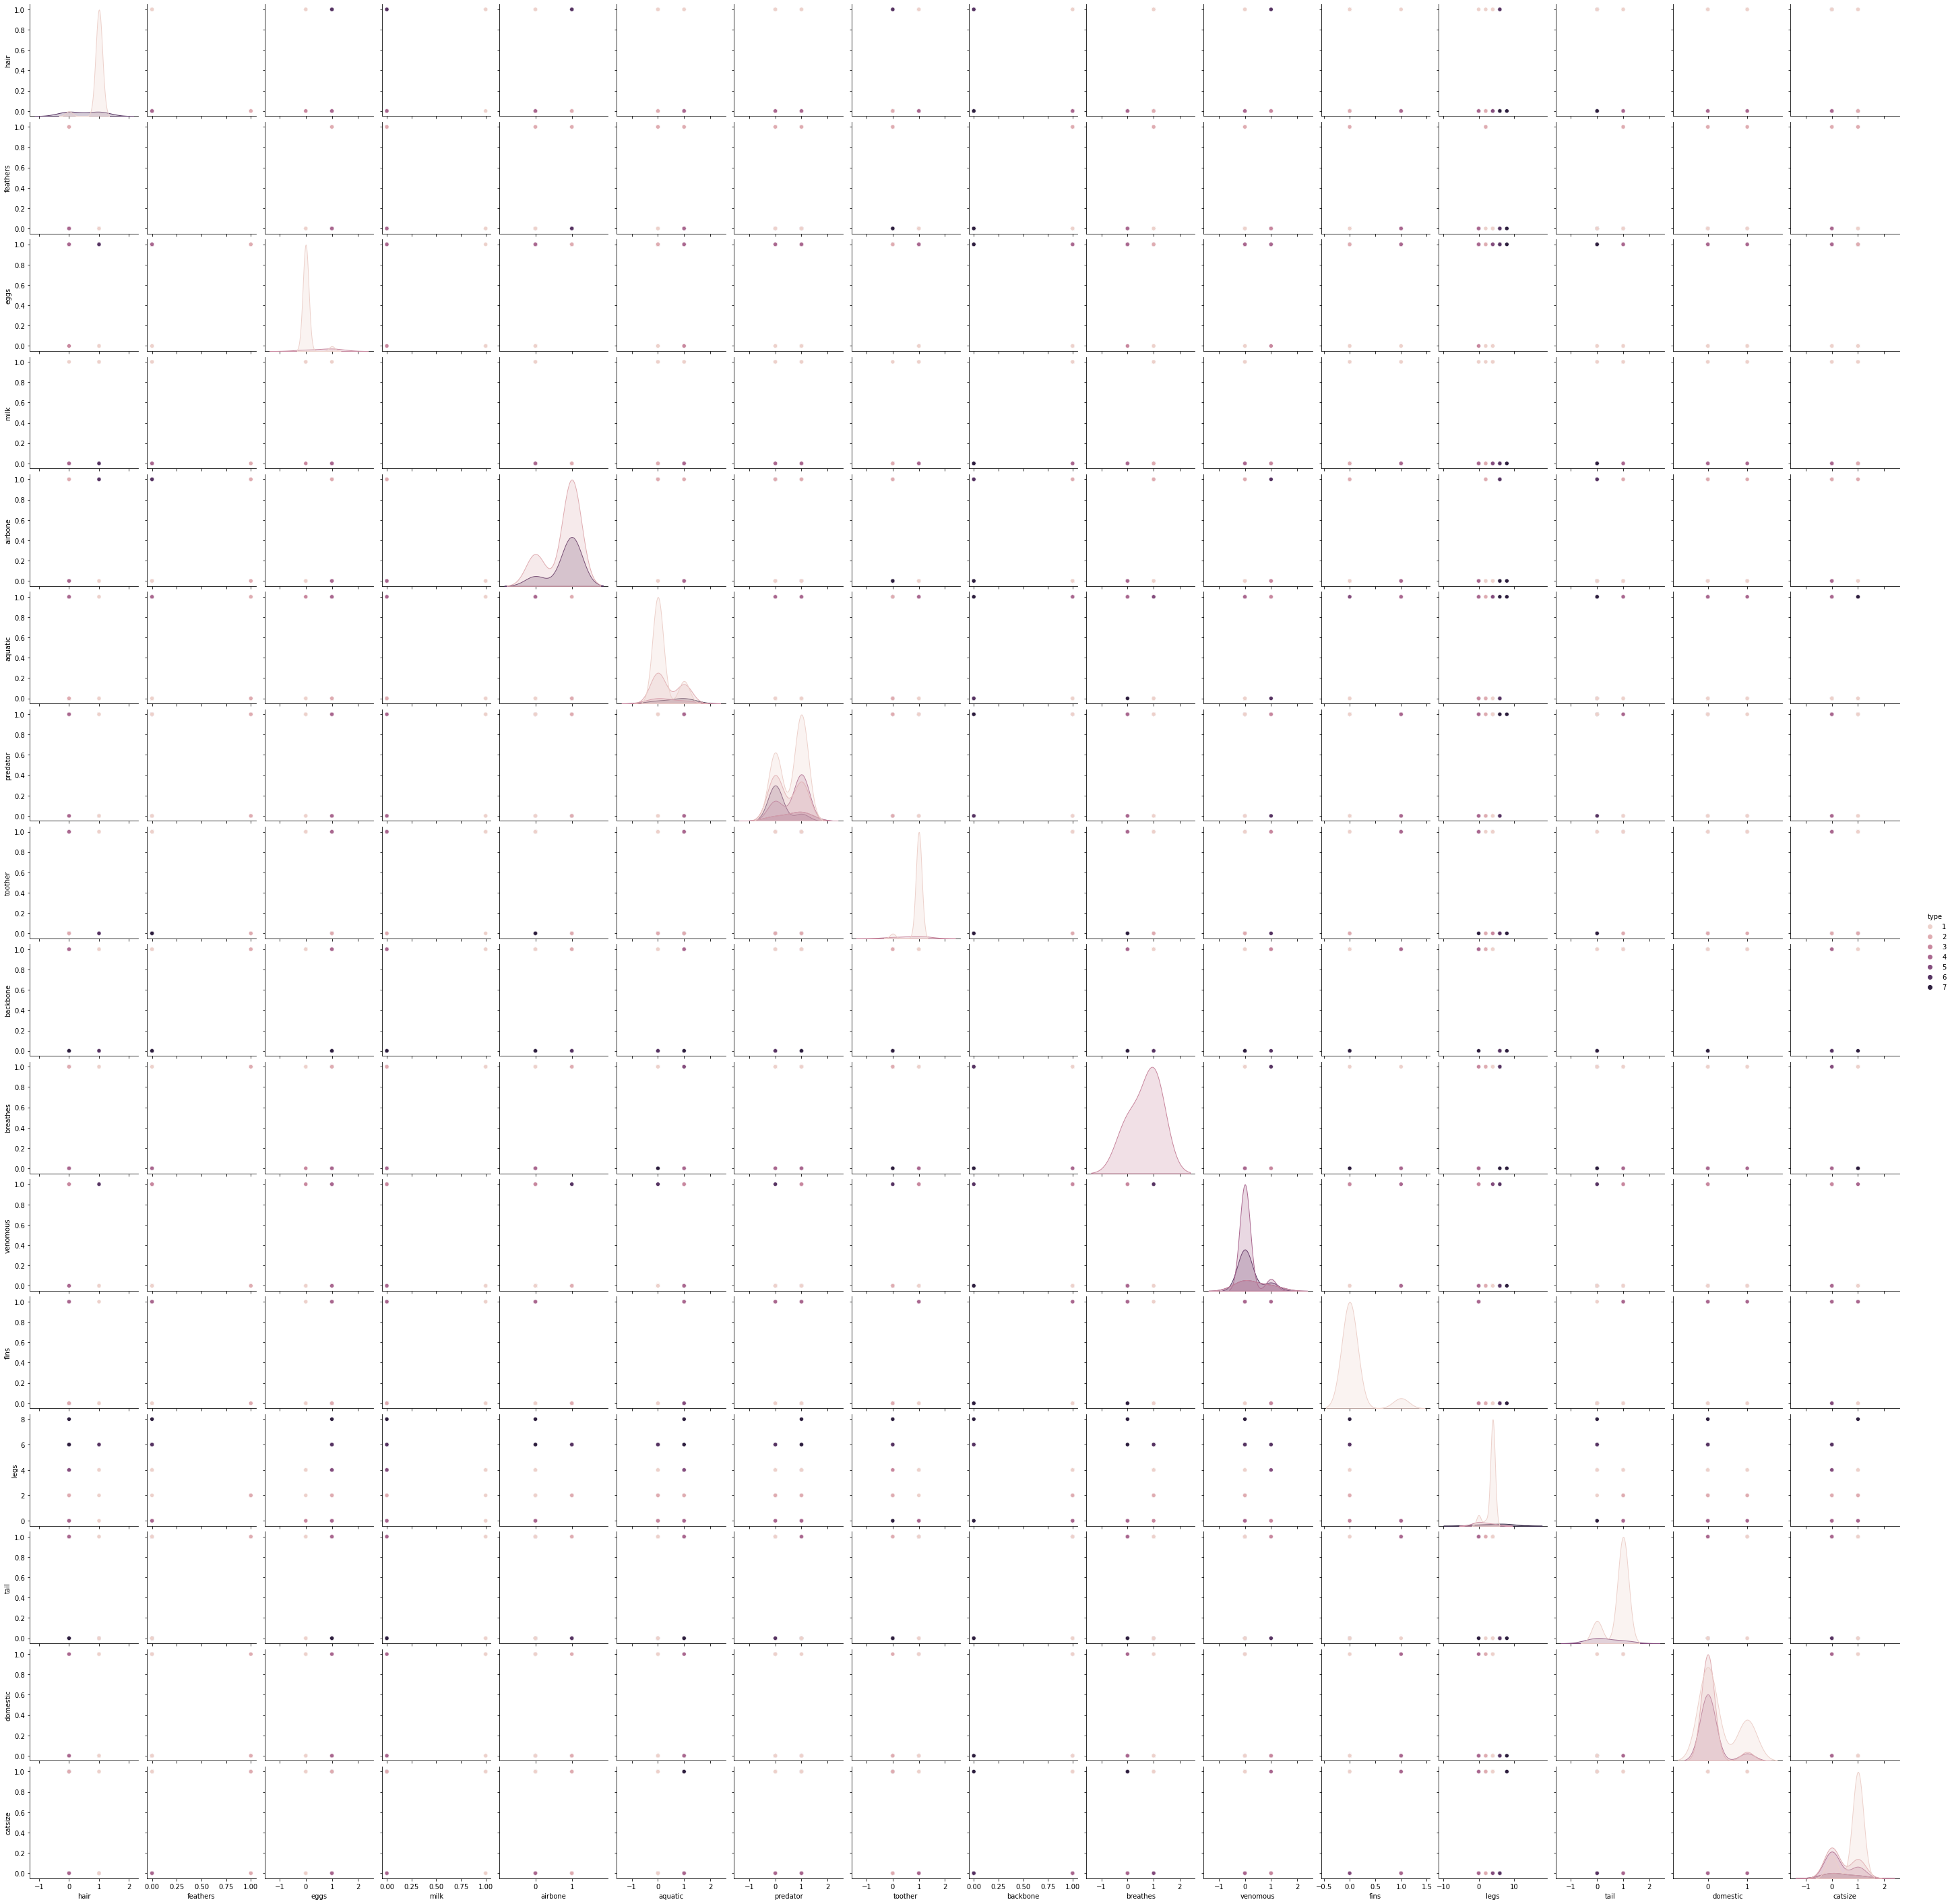

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **gaussian_naive_bayes_algorithm** definida previamente en esta guía, pasando como parametros:
1. El número máximo de iteraciones para que el algoritmo de regresión logística
2. El conjunto de datos de entrenamiento
3. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
4. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [46]:
train_label = train_data.pop('type')
test_label = test_data.pop('type')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normalized_train_data = norm(train_data)
normalized_test_data = norm(test_data)

In [47]:

model, train_elapsed_time = build_simple_tensorflow_model(train_data)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [75]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

start_time = datetime.datetime.now()

EPOCHS = 100000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#normalized_train_data.pop('type')

history = model.fit(
  normalized_train_data, train_label,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, PrintDot()])

#normalized_test_data.pop('type')
loss, mae, mse = model.evaluate(normalized_test_data, test_label, verbose=2)
predictions = model.predict(normalized_test_data).flatten()
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions


.......................2/2 - 0s - loss: 0.2561 - mae: 0.2158 - mse: 0.2561


array([0.9233984, 1.0000292, 0.9999283, 0.9999283, 6.993991 , 7.0009117,
       4.000087 , 0.9998688, 1.9998684, 4.9341054, 1.0059998, 1.0000292,
       1.4297705, 1.1993546, 1.9983754, 5.54931  , 2.000194 , 0.9999283,
       1.9998684, 2.000194 , 3.999873 , 3.6249294, 0.9999283, 0.9999283,
       1.0003636, 1.680137 , 4.357261 , 3.9999778, 1.0045524, 6.278628 ,
       2.000939 , 6.3656845, 1.5514565, 6.9980235, 5.9989195, 2.2438788,
       1.0059998, 1.1993546, 1.2962546, 6.3656845], dtype=float32)

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [76]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [77]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [78]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_label)
algorithm_scores.loc[len(algorithm_scores)] = ['Neural Network', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [79]:
algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Neural Network,0.215848,0.256081,84.162,1205.437
